In [22]:
# import packages and data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import joblib
import warnings
warnings.filterwarnings('ignore')

tr_features = pd.read_csv('./x_train_features4.csv')
tr_labels = pd.read_csv('./y_train_labels4.csv')


In [23]:
def print_results(results):
    print(f'Best Params: {results.best_params_}')
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    
    print('Test results:')
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print(f'{round(mean, 3)} (+/-{round(std, 3)}) for {params}')
        
        
def pkl_best_params(results, model_type: str):
    joblib.dump(results.best_estimator_, f'./{model_type}_model.pkl')
    
    
def plot_performance(results):
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    best_est = results.best_estimator_
    columns = list(results.cv_results_)
    rows = [f'{x}' for x in results.cv_results_['params']]
    nrows = len(results.cv_results_)      
    
    
    plt.figure(figsize=(16,9))
    plt.bar(rows, means)
    plt.xticks(rotation=45, ha="right")
    
    plt.show()
    

In [24]:
lr = LogisticRegression(max_iter=500)
params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

lr_cv = GridSearchCV(lr, params, cv=5) # creates the cross-validation object
lr_cv.fit(tr_features, tr_labels.values.ravel()) # .ravel() converts tr_labels from an object vector to an array

print_results(lr_cv)

Best Params: {'C': 10}
Test results:
0.763 (+/-0.005) for {'C': 0.001}
0.804 (+/-0.008) for {'C': 0.01}
0.823 (+/-0.009) for {'C': 0.1}
0.826 (+/-0.008) for {'C': 1}
0.827 (+/-0.007) for {'C': 10}
0.827 (+/-0.008) for {'C': 100}
0.826 (+/-0.008) for {'C': 1000}


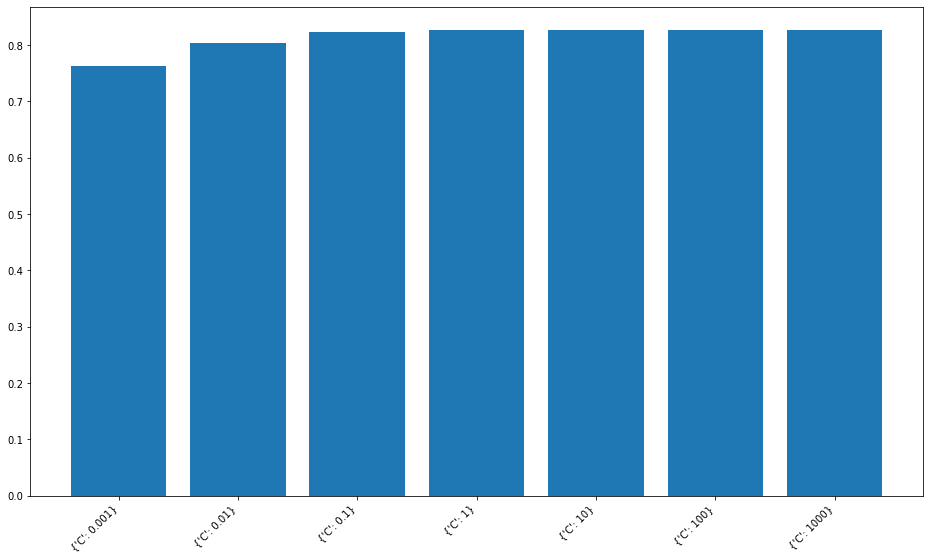

In [25]:
plot_performance(lr_cv)

In [26]:
# save best params as pkl

pkl_best_params(lr_cv, 'LR')

In [27]:
# create support vector machine model

svc = SVC()
svc_params = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10]
}

svc_cv = GridSearchCV(svc, svc_params, cv=5)
svc_cv.fit(tr_features, tr_labels.values.ravel())

print_results(svc_cv)

Best Params: {'C': 10, 'kernel': 'rbf'}
Test results:
0.824 (+/-0.009) for {'C': 0.1, 'kernel': 'linear'}
0.835 (+/-0.01) for {'C': 0.1, 'kernel': 'poly'}
0.832 (+/-0.008) for {'C': 0.1, 'kernel': 'rbf'}
0.703 (+/-0.02) for {'C': 0.1, 'kernel': 'sigmoid'}
0.827 (+/-0.011) for {'C': 1, 'kernel': 'linear'}
0.849 (+/-0.009) for {'C': 1, 'kernel': 'poly'}
0.848 (+/-0.008) for {'C': 1, 'kernel': 'rbf'}
0.67 (+/-0.012) for {'C': 1, 'kernel': 'sigmoid'}
0.827 (+/-0.011) for {'C': 10, 'kernel': 'linear'}
0.854 (+/-0.005) for {'C': 10, 'kernel': 'poly'}
0.857 (+/-0.006) for {'C': 10, 'kernel': 'rbf'}
0.671 (+/-0.009) for {'C': 10, 'kernel': 'sigmoid'}


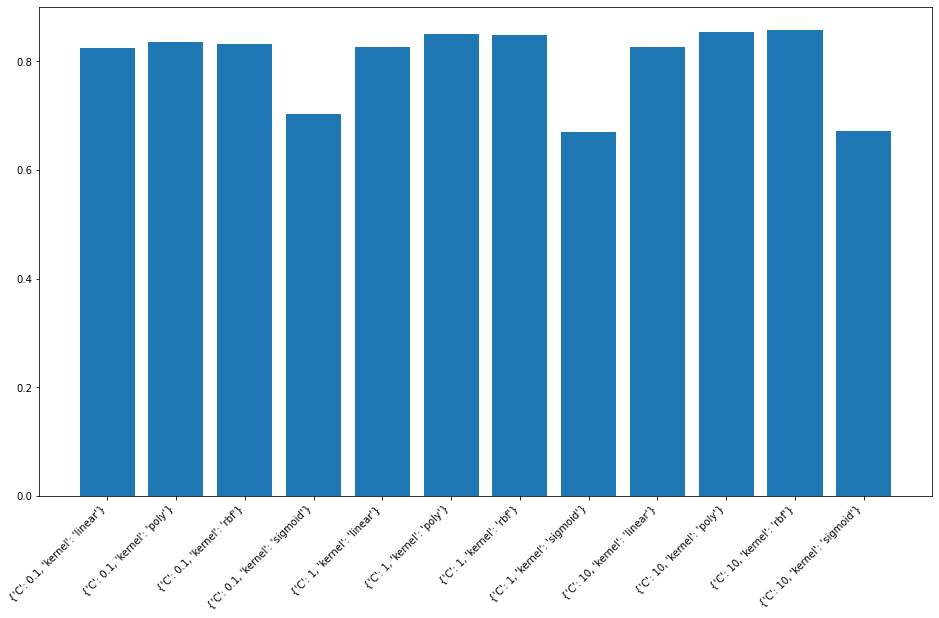

In [28]:
plot_performance(svc_cv)

In [29]:
# save best params as pkl

pkl_best_params(svc_cv, 'SVM')

In [30]:
# create multi-layer perceptron model

mlp = MLPClassifier()
mlp_params = {
    'hidden_layer_sizes':[(10,), (10,2), (50,), (100,), (500,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

mlp_cv = GridSearchCV(mlp, mlp_params, cv=5)
mlp_cv.fit(tr_features, tr_labels.values.ravel())

print_results(mlp_cv)

Best Params: {'activation': 'relu', 'hidden_layer_sizes': (500,), 'learning_rate': 'invscaling'}
Test results:
0.828 (+/-0.008) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.828 (+/-0.006) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.826 (+/-0.005) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.831 (+/-0.009) for {'activation': 'relu', 'hidden_layer_sizes': (10, 2), 'learning_rate': 'constant'}
0.835 (+/-0.008) for {'activation': 'relu', 'hidden_layer_sizes': (10, 2), 'learning_rate': 'invscaling'}
0.83 (+/-0.013) for {'activation': 'relu', 'hidden_layer_sizes': (10, 2), 'learning_rate': 'adaptive'}
0.842 (+/-0.009) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.844 (+/-0.007) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.84 (+/-0.012) for {'activation': 'relu', 'hidden_layer_sizes

In [31]:
# save best params as pkl

pkl_best_params(mlp_cv, 'MLP')

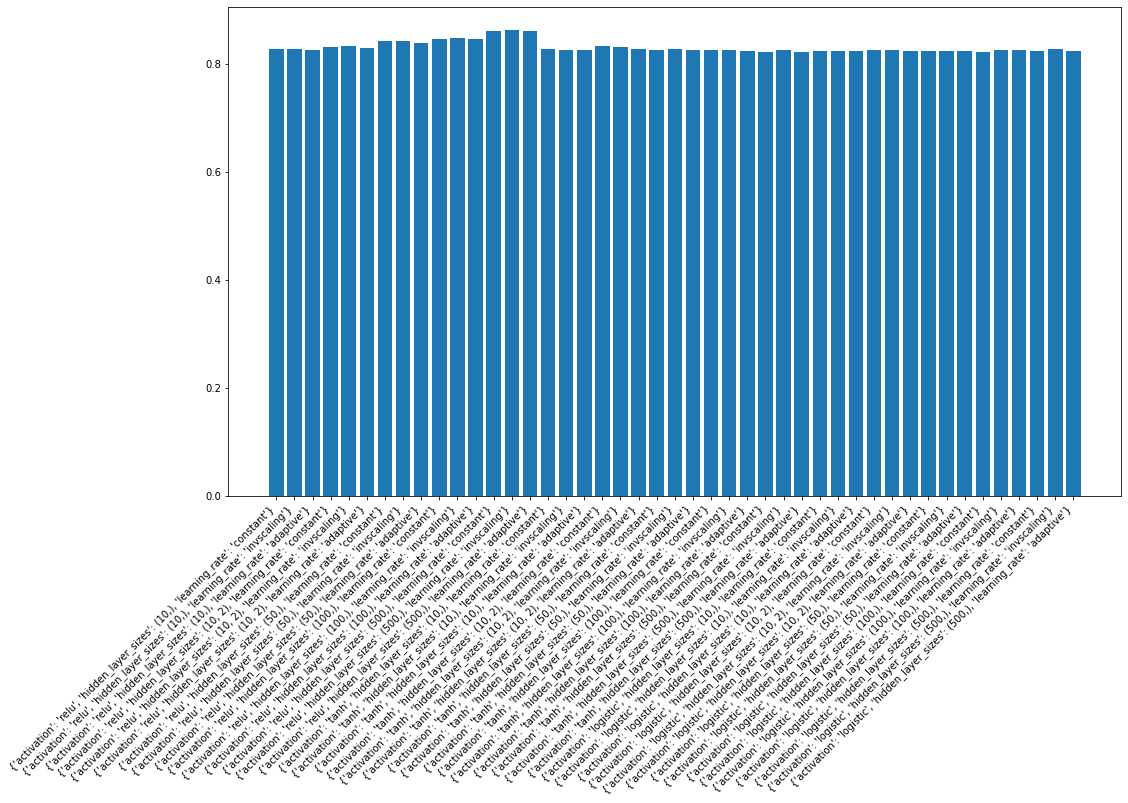

In [32]:
plot_performance(mlp_cv)

In [33]:
# create random forest model

rf = RandomForestClassifier()
rf_params = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

rf_cv = GridSearchCV(rf, rf_params, cv=5)
rf_cv.fit(tr_features, tr_labels.values.ravel())

print_results(rf_cv)

Best Params: {'max_depth': 32, 'n_estimators': 250}
Test results:
0.797 (+/-0.011) for {'max_depth': 2, 'n_estimators': 5}
0.81 (+/-0.009) for {'max_depth': 2, 'n_estimators': 50}
0.814 (+/-0.004) for {'max_depth': 2, 'n_estimators': 250}
0.824 (+/-0.007) for {'max_depth': 4, 'n_estimators': 5}
0.836 (+/-0.004) for {'max_depth': 4, 'n_estimators': 50}
0.834 (+/-0.003) for {'max_depth': 4, 'n_estimators': 250}
0.867 (+/-0.011) for {'max_depth': 8, 'n_estimators': 5}
0.878 (+/-0.006) for {'max_depth': 8, 'n_estimators': 50}
0.879 (+/-0.005) for {'max_depth': 8, 'n_estimators': 250}
0.91 (+/-0.005) for {'max_depth': 16, 'n_estimators': 5}
0.93 (+/-0.003) for {'max_depth': 16, 'n_estimators': 50}
0.933 (+/-0.004) for {'max_depth': 16, 'n_estimators': 250}
0.91 (+/-0.011) for {'max_depth': 32, 'n_estimators': 5}
0.935 (+/-0.005) for {'max_depth': 32, 'n_estimators': 50}
0.937 (+/-0.005) for {'max_depth': 32, 'n_estimators': 250}
0.918 (+/-0.008) for {'max_depth': None, 'n_estimators': 5}
0.

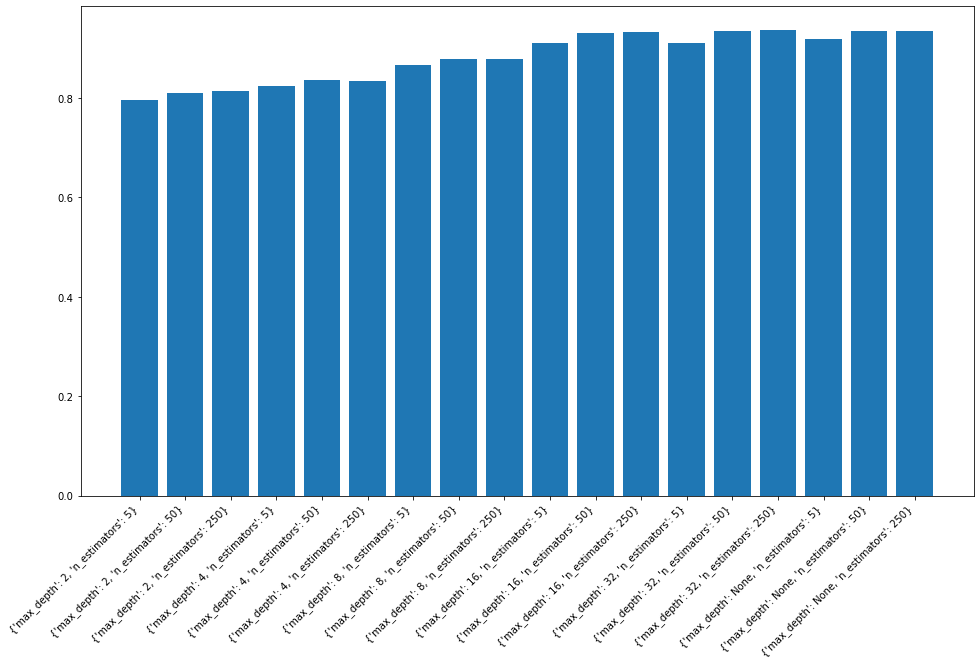

In [34]:
plot_performance(rf_cv)

In [35]:
# save best params as pkl

pkl_best_params(rf_cv, 'RF')

In [36]:
# create gradient boosting model

gbm = GradientBoostingClassifier()
gbm_params = {
    'n_estimators': [50, 250, 500, 2500],
    'max_depth': [1, 2, 3],
    'learning_rate': [0.1, 0.5, 1]
}

gbm_cv = GridSearchCV(gbm, gbm_params, cv=5)
gbm_cv.fit(tr_features, tr_labels.values.ravel())

print_results(gbm_cv)

Best Params: {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 2500}
Test results:
0.812 (+/-0.004) for {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 50}
0.846 (+/-0.006) for {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 250}
0.854 (+/-0.005) for {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 500}
0.86 (+/-0.007) for {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 2500}
0.837 (+/-0.002) for {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}
0.878 (+/-0.006) for {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 250}
0.901 (+/-0.005) for {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 500}
0.938 (+/-0.002) for {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 2500}
0.861 (+/-0.006) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
0.905 (+/-0.004) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 250}
0.929 (+/-0.004) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
0.947 (+/-0.004) for {'

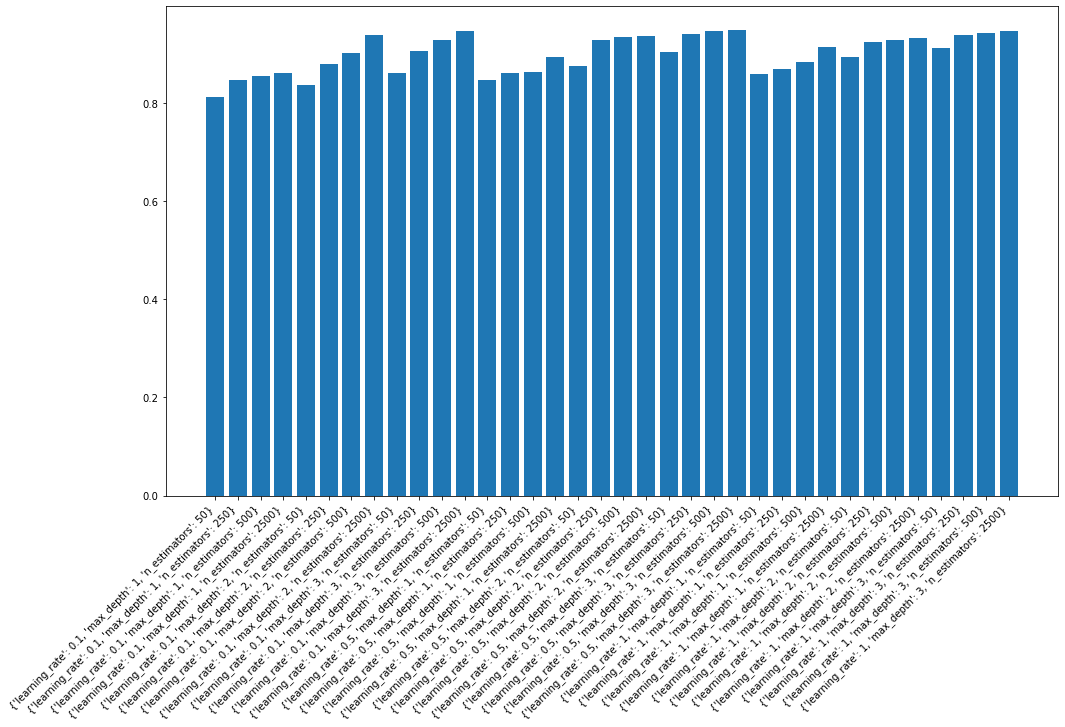

In [37]:
plot_performance(gbm_cv)

In [38]:
# save best params as pkl

pkl_best_params(gbm_cv, 'GBM')